## Savitsky-Golay Filters

### Paul Anzel 2/17/2016

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('white')
np.set_printoptions(suppress=True, precision=3)
%matplotlib inline

/Users/anzelp/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Let's a store wants to understand how long it would take for clients to respond to an ad-campaign--at 12 o'clock an e-mail blast comes out, and over the next several hours more and more people will (hopefully!) start visiting the website. But visits are inherently noisy, so how do you clean up the noise so you can figure out how long it takes for the ad campaign to take effect?

In [2]:
np.random.seed(628)
hours = np.arange(-12, 48, dtype='float')

# PRETEND YOU'RE NOT SEEING THIS!
visits = 1000 #baseline
visits = visits + 200/(np.exp(-1.25*hours+5) + 1) # A nice sigmoid...
no_noise_visits = visits.copy()
visits = visits + 30*np.random.randn(len(hours))
visits = np.around(visits)


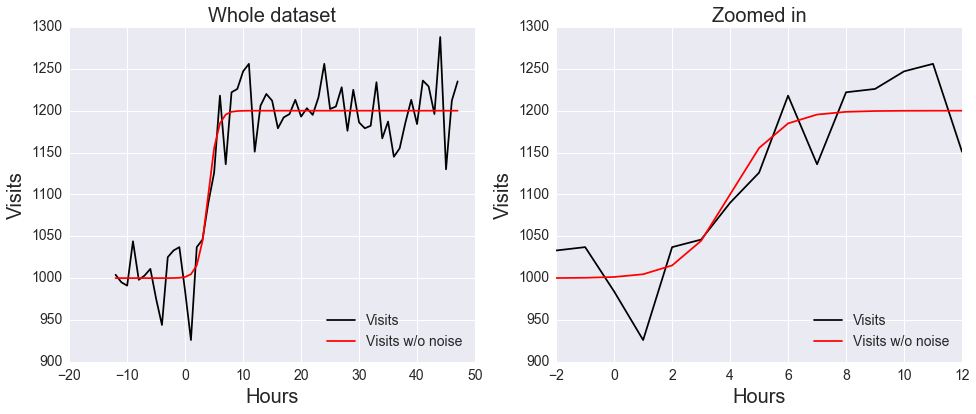

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
axes[0].plot(hours, visits, color='k', label='Visits')
axes[0].plot(hours, no_noise_visits, color='r', label='Visits w/o noise')
axes[0].set_xlabel('Hours', fontsize=20)
axes[0].set_ylabel('Visits', fontsize=20)
axes[0].set_title('Whole dataset', fontsize=20)
axes[0].tick_params(labelsize=14)
axes[0].legend(fontsize=14, loc='lower right')
sns.despine()

axes[1].plot(hours[10:25], visits[10:25], color='k', label='Visits')
axes[1].plot(hours[10:25], no_noise_visits[10:25], color='r', label='Visits w/o noise')
axes[1].set_xlabel('Hours', fontsize=20)
axes[1].set_ylabel('Visits', fontsize=20)
axes[1].set_title('Zoomed in', fontsize=20)
axes[1].tick_params(labelsize=14)
axes[1].legend(fontsize=14, loc='lower right')

One might try and fit some model to the data, but unlike the toy example above, you might not have an easy function to fit.

However, since you anticipate that you've got noise up and down, maybe you want a moving average to try and smooth this over:

In [4]:
visits_3hr = (visits[:-2] + visits[1:-1] + visits[2:])/3.0
visits_5hr = (visits[:-4] + visits[1:-3] + visits[2:-2] + visits[3:-1] + visits[4:])/5.0
visits_10hr = (visits[:-9] + visits[1:-8] + visits[2:-7] + visits[3:-6] + visits[4:-5] +
               visits[5:-4] + visits[6:-3] + visits[7:-2] + visits[8:-1] + visits[9:])/10.0

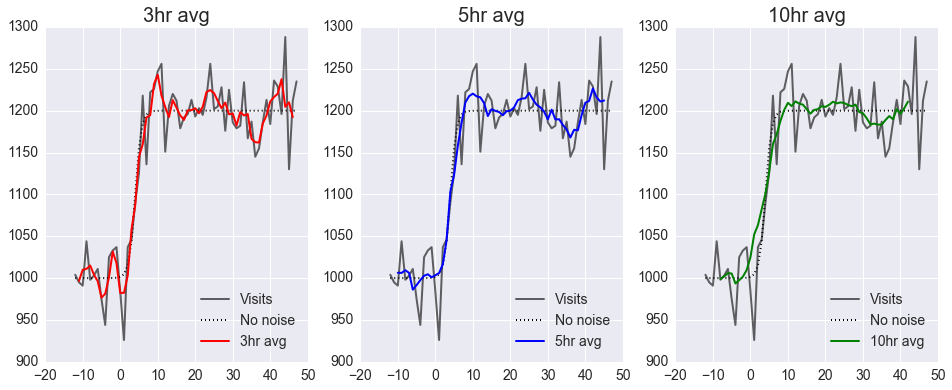

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
axes[0].plot(hours, visits, color='k', alpha=0.6, linewidth=2, label='Visits')
axes[0].plot(hours, no_noise_visits, color='k', linestyle=':', linewidth=2, label='No noise')
axes[0].plot(hours[1:-1], visits_3hr, color='r', linewidth=2, label='3hr avg')
axes[0].set_title('3hr avg', fontsize=20)
axes[0].tick_params(labelsize=14)
axes[0].legend(fontsize=14, loc='lower right')

axes[1].plot(hours, visits, color='k', alpha=0.6, linewidth=2, label='Visits')
axes[1].plot(hours, no_noise_visits, color='k', linestyle=':', linewidth=2, label='No noise')
axes[1].plot(hours[2:-2], visits_5hr, color='b', linewidth=2, label='5hr avg')
axes[1].set_title('5hr avg', fontsize=20)
axes[1].tick_params(labelsize=14)
axes[1].legend(fontsize=14, loc='lower right')

axes[2].plot(hours, visits, color='k', alpha=0.6, linewidth=2, label='Visits')
axes[2].plot(hours, no_noise_visits, color='k', linestyle=':', linewidth=2, label='No noise')
axes[2].plot(hours[4:-5], visits_10hr, color='g', linewidth=2, label='10hr avg')
axes[2].set_title('10hr avg', fontsize=20)
axes[2].tick_params(labelsize=14)
axes[2].legend(fontsize=14, loc='lower right')

# plt.plot(hours, visits, color='k', label='data')
# plt.plot(hours[1:-1], visits_3hr, color='r', label='3hr avg')
# plt.plot(hours[2:-2], visits_5hr, color='b', label='5hr avg')
# plt.plot(hours[4:-5], visits_10hr, color='g', label='10hr avg')
# plt.xlabel('Hours', fontsize=20)
# plt.ylabel('Visits', fontsize=20)
# plt.tick_params(labelsize=14)
# plt.legend(fontsize=14, loc='lower right')
sns.despine()


So a 3-hour moving average is a little too noisy, a 5-hour one seems okay, and a 10-hour one lags. Perhaps 7 or 8 hours would be good, but this is ultimately kind of a fiddly process and since we don't know the true fit may be a bit too subjective. Plus, blindly adding moving averages can cause some real problems--for example, while a simple moving average preserves the area under a curve, it obviously broadens out the width of that curve.

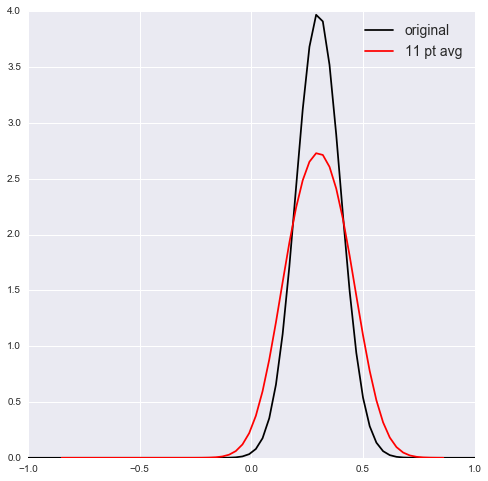

In [6]:
dx_gaussian = 0.03
x_gaussian = np.arange(-1, 1+dx_gaussian, dx_gaussian)
y_gaussian = sp.stats.norm.pdf(x_gaussian, loc=0.3, scale=0.1)

### 11 point moving average
x_gaussian11 = x_gaussian[5:-5]
y_gaussian11 = (y_gaussian[:-10] + y_gaussian[1:-9] + y_gaussian[2:-8] + y_gaussian[3:-7] +
                y_gaussian[4:-6] + y_gaussian[5:-5] + y_gaussian[6:-4] + y_gaussian[7:-3] +
                y_gaussian[8:-2] + y_gaussian[9:-1] + y_gaussian[10:])/11.0

plt.figure(figsize=(8,8))
plt.plot(x_gaussian, y_gaussian, color='k', label='original')
plt.plot(x_gaussian11, y_gaussian11, color='r', label='11 pt avg')
plt.legend(fontsize=14)
plt.axis([-1, 1, 0, 4])
sns.despine()

In [7]:
area_gaussian = np.sum(y_gaussian)*dx_gaussian
print('Area of Gaussian: %.3f' % area_gaussian)
mean_gaussian = np.sum(y_gaussian*x_gaussian*dx_gaussian)
print('Mean of Gaussian: %.3f' % mean_gaussian)
std_gaussian = np.sqrt(np.sum(y_gaussian*x_gaussian*x_gaussian)*dx_gaussian - mean_gaussian**2)
print('StDev of Gaussian: %.3f' % std_gaussian)

area_gaussian11 = np.sum(y_gaussian11)*dx_gaussian
print('Area of 11-pt-avg Gaussian: %.3f' % area_gaussian11)
mean_gaussian11 = np.sum(y_gaussian11*x_gaussian11*dx_gaussian)
print('Mean of 11-pt-avg Gaussian: %.3f' % mean_gaussian11)
std_gaussian11 = np.sqrt(np.sum(y_gaussian11*x_gaussian11*x_gaussian11)*dx_gaussian - mean_gaussian11**2)
print('StDev of 11-pt-avg Gaussian: %.3f' % std_gaussian11)

Area of Gaussian: 1.000
Mean of Gaussian: 0.300
StDev of Gaussian: 0.100
Area of 11-pt-avg Gaussian: 1.000
Mean of 11-pt-avg Gaussian: 0.300
StDev of 11-pt-avg Gaussian: 0.138


And our estimate of the width has increased by 38% :(.

So, is there a smarter way to do our moving average? Can we pick a way lets us preserve more features of our data?

### The filter

The [trick](http://pubs.acs.org/doi/abs/10.1021/ac60214a047)$^*$--found by Abraham Savitsky and Marcel Golay--was that you can do local, least-squares fits to various polynomials by convolving with specific kernels, provided the data is evenly spaced. [Animation on Wikipedia.](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter#/media/File:Lissage_sg3_anim.gif) And, by choosing the order of the polynomial you use, you keep data structure up to a particular moment. Plus, you can easily pick kernels for derivatives as well!

This is in a similar vein to LOESS methods (developed a decade later) with uniform time-sampling, but working with convolutions is fairly intuitive and easy to implement, and requires less computational effort (admittedly less of a concern now compared to the 70's).

$^*$Paper behind a paywall and some of their coefficient tables were later corrected, but kind of worth a gander for FORTRAN code from the 60's!!!

To start out with, we pick some length of the filter $L = 2M+1$ (so $L$ is odd). For some point $x_i$ we want to solve for, consider the $M$ points on either side. Using a change of variable $n = \frac{x-x_i}{\Delta x}$ (so the points range from $n = -M, -M + 1, \cdots, M$) we try and do a least squares fit to a polynomial of order $N$:

$$y = a_0 + a_1 n + a_2 n^2 + \cdots a_N n^N$$


(we want $N < 2M$ for properly defined solutions, and ideally $N << 2M$ to keep the solver from being ill-conditioned).

Doing the least-squares minimization (you have the derivatives $\frac{\partial \text{Err}}{\partial a_i}$ that you want to set to 0) you will end up with a matrix solution

$$\mathbf{a} = \mathbf{(A^T A)^{-1}A^T y}$$

Where the matrix __A__ is a Jacobian matrix (derivatives with respect to the coefficients $a_i$) evaluated at the various values of $n$, __y__ is the vector of values at $n$, and __a__ is the vector of $a_i$'s. Specifically:

$$\mathbf{A} = \begin{pmatrix}
n_{-M}^0 & n_{-M}^1 & \cdots & n_{-M}^N \\
n_{-M+1}^0 & n_{-M+1}^1 & \cdots & n_{-M+1}^N \\
\vdots & \vdots & \ddots & \vdots \\
n_{M}^0 & n_{M}^1 & \cdots & n_{M}^N
\end{pmatrix}$$

For example, if $M = 2$ and $N = 3$, we get

$$\mathbf{A} = \begin{pmatrix}
1 & -2 & 4 & -8 \\
1 & -1 & 1 & -1 \\
1 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 \\
1 & 2 & 4 & 8
\end{pmatrix}$$

Additionally

$$\mathbf{A^T A} = \begin{pmatrix}
2M+1 & \sum n & \sum n^2 & \cdots & \sum n^N \\
\sum n & \sum n^2 & \sum n^3 & \cdots & \sum n^{N+1} \\
\sum n^2 & \sum n^3 & \sum n^4 & \cdots & \sum n^{N+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum n^N & \sum n^{N+1} & \sum n^{N+2} & \cdots & \sum n^{2N}
\end{pmatrix}$$

and sums of even terms will cancel out to zero (since $n$ runs from $-M$ to $M$).

Solving $\mathbf{H = (A^T A)^{-1}A^T}$ and picking various rows lets us pick out terms of our polynomial, and since we have a polynomial we're evaluating at $n = 0$, we find that:
- The constant order term $a_0$ gives us the polynomial smoothing values, which corresponds to the top row of __H__.
- The first order term $a_1$ gives us the first derivative, corresponding to the second row of __H__. However, we need to rescale by $\Delta x$, so to go back to $x$ space divide by $\Delta x$.
- Twice second order term $a_2$ gives us the second derivative, corresponding to the third row of __H__ multiplied 2. Given rescaling above, go to back to $x$ divide by $(\Delta x)^2$.
- The $k^{th}$ order term $a_k$ multiplied $k$ factorial gives us the $k^{th}$ derivative, corresponding to the $(k+1)^{th}$ row of __H__ multiplied $k!$ and divided by $(\Delta x)^k$.
  - This also tells us that we need a filter of order $N \geq k$ if we're interested in the $k^{th}$ derivative.
 
Note that if you're dealing with data at a boundary, you could try and use the above definitions for __A__ and $\mathbf{A^TA}$ but with different values of $n$ to get coefficents that are not centered around your data-point.

### In practice

We can get the Savitsky-Golay coefficients for our convolution using the function [`scipy.signal.savgol_coeffs()`](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.signal.savgol_coeffs.html). Additionally, [`scipy.signal.savgol_filter()`](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.signal.savgol_filter.html) does the entire process for us.

[Wikipedia](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter#Tables_of_selected_convolution_coefficients) has tables of coefficients.

In [8]:
from scipy.signal import savgol_coeffs, savgol_filter

[-0.084  0.021  0.103  0.161  0.196  0.207  0.196  0.161  0.103  0.021
 -0.084]


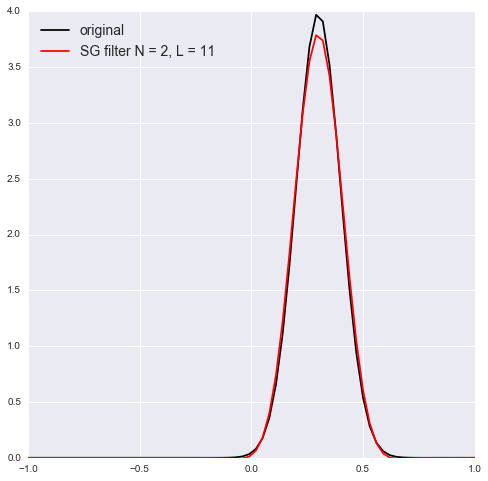

In [9]:
SG_11_coefs = savgol_coeffs(11, 2)
print(SG_11_coefs)
y_SG = savgol_filter(y_gaussian, 11, 2, delta=dx_gaussian)

plt.figure(figsize=(8,8))
plt.plot(x_gaussian, y_gaussian, color='k', label='original')
plt.plot(x_gaussian, y_SG, color='r', label='SG filter N = 2, L = 11')
plt.legend(fontsize=14, loc='upper left')
plt.axis([-1, 1, 0, 4])
sns.despine()

In [10]:
area_gaussian = np.sum(y_gaussian)*dx_gaussian
print('Area of Gaussian: %.3f' % area_gaussian)
mean_gaussian = np.sum(y_gaussian*x_gaussian*dx_gaussian)
print('Mean of Gaussian: %.3f' % mean_gaussian)
std_gaussian = np.sqrt(np.sum(y_gaussian*x_gaussian*x_gaussian)*dx_gaussian - mean_gaussian**2)
print('StDev of Gaussian: %.3f' % std_gaussian)

area_SG = np.sum(y_SG)*dx_gaussian
print('Area of 11-2-SG Gaussian: %.3f' % area_SG)
mean_SG = np.sum(y_SG*x_gaussian*dx_gaussian)
print('Mean of 11-2-SG Gaussian: %.3f' % mean_SG)
std_SG = np.sqrt(np.sum(y_SG*x_gaussian*x_gaussian)*dx_gaussian - mean_SG**2)
print('StDev of 11-2-SG Gaussian: %.3f' % std_SG)

Area of Gaussian: 1.000
Mean of Gaussian: 0.300
StDev of Gaussian: 0.100
Area of 11-2-SG Gaussian: 1.000
Mean of 11-2-SG Gaussian: 0.300
StDev of 11-2-SG Gaussian: 0.100


So, if we tried to filter our visits data:

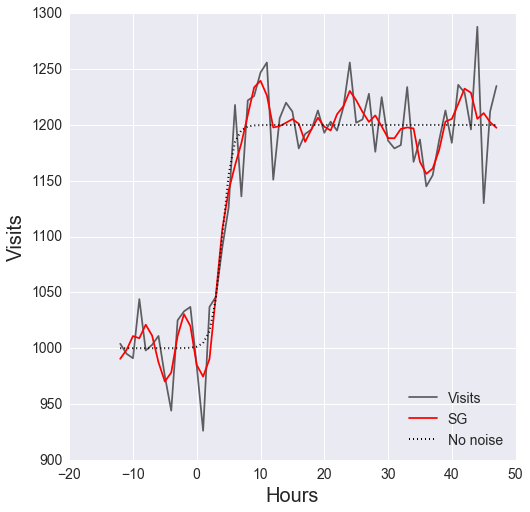

In [11]:
SGvisits = savgol_filter(visits, 13, 6, delta=1, mode='mirror')

plt.figure(figsize=(8,8))
plt.plot(hours, visits, color='k', alpha=0.6, label='Visits')
plt.plot(hours, SGvisits, color='r', label='SG')
plt.plot(hours, no_noise_visits, color='k', linestyle=':', linewidth=2, label='No noise')
plt.legend(loc='lower right', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('Hours', fontsize=20)
plt.ylabel('Visits', fontsize=20)
sns.despine()

This looks better--we're looking at 13 data points but not having the same issues we had with the 10-point average. But it's still a bit hard to tell.

But, since it's very straight-forward to get a derivative SG filter, let's try using that.

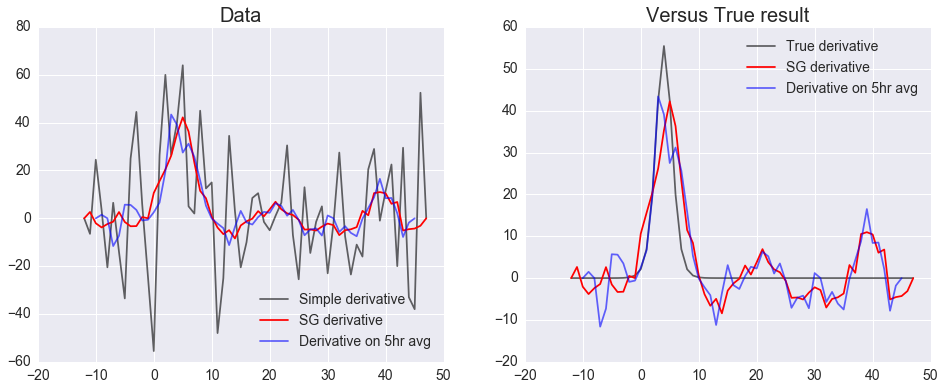

In [12]:
dumb_deriv = savgol_filter(visits, 3, 1, deriv=1, delta=1, mode='mirror')
# ^^^ this is the -1, 0, 1 centered difference derivative
deriv_on_nonoise = savgol_filter(no_noise_visits, 3, 1, deriv=1, delta=1, mode='mirror')
SGvisits_deriv = savgol_filter(visits, 15, 4, deriv=1, delta=1, mode='mirror')
deriv_on_5hr = savgol_filter(visits_5hr, 3, 1, deriv=1, delta=1, mode='mirror')
#hours[2:-2], visits_5hr


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

axes[0].plot(hours, dumb_deriv, color='k', alpha=0.6, label='Simple derivative')
axes[0].plot(hours, SGvisits_deriv, color='r', label='SG derivative')
axes[0].plot(hours[2:-2], deriv_on_5hr, color='b', alpha=0.6, label='Derivative on 5hr avg')
axes[0].legend(loc='lower right', fontsize=14)
axes[0].set_title('Data', fontsize=20)
axes[0].tick_params(labelsize=14)

axes[1].plot(hours, deriv_on_nonoise, color='k', alpha=0.6, label='True derivative')
axes[1].plot(hours, SGvisits_deriv, color='r', label='SG derivative')
axes[1].plot(hours[2:-2], deriv_on_5hr, color='b', alpha=0.6, label='Derivative on 5hr avg')
axes[1].legend(loc='upper right', fontsize=14)
axes[1].set_title('Versus True result', fontsize=20)
axes[1].tick_params(labelsize=14)

The simple derivative (in black) is too noisy for anything, and the derivative on the 5hr moving average is still a bit iffy, but we can pretty clearly see the signal with the Savitsky-Golay derivative. If we took a FWHM we'd see around 6ish hours, which would be pretty reasonable. With further analysis I'd probably smooth the initial data points to a baseline level, providing an even more accurate result.

### More things to know

- A no-derivative Savitsky-Golay filter of order $N = 0$ or $N = 1$ is the same thing as a simple moving average.
- A Savitsky-Golay filter of order $N$ preserves moments of order $n \leq N$. So, for our Gaussian above, we saw the 2nd order SG filter we could correctly get the standard deviation. If we wanted to find kurtosis (a 4th order statistic) we'd want $N \geq 4$.
- The coefficents of a 0-derivative SG filter are symmetric, as are for even derivatives. Odd derivatives are anti-symmetric.
- Since 0-derivative SG filters are symmetric, their Fourier Transforms are real and thus they are completely phase-preserving. Peaks, valleys, and important time-based stuff that we really want to know 'when things happened' of stay where they are.
- SG filters don't do a lot of high-frequency attenuation, so if you're using them to try and knock out noise and see a single frequency signal, they might not be the best choice. On the other-hand, their pass-bands are very flat (and so again, very good at preserving the time-based signal).

<function __main__.Fourier_SG_coefs>

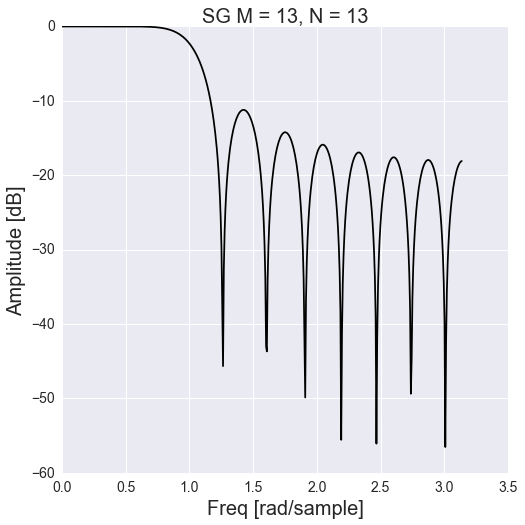

In [13]:
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import freqz
from ipywidgets import interact

def Fourier_SG_coefs(M, N):
    # Just so we don't get crazy N's
    if N > 2*M:
        N = 2*M
    SG_coefs = savgol_coeffs(2*M+1, N)
    w, h = freqz(SG_coefs)
    plt.figure(figsize=(8,8))
    plt.plot(w, 20*np.log10(abs(h)), color='k')
    plt.ylabel('Amplitude [dB]', fontsize=20)
    plt.xlabel('Freq [rad/sample]', fontsize=20)
    plt.tick_params(labelsize=14)
    plt.title('SG M = %d, N = %d' % (M, N), fontsize=20)

interact(Fourier_SG_coefs, M=(1, 25, 1), N=(1, 25, 1))

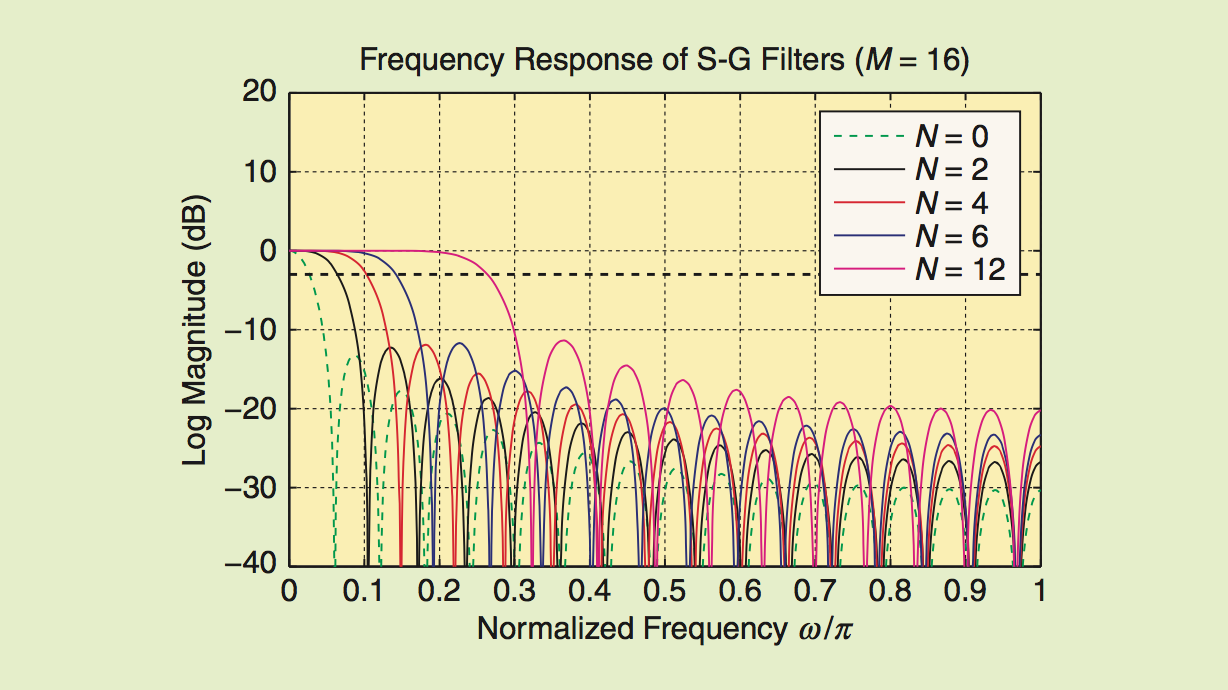

In [14]:
from IPython.display import Image
Image('SG_Fourier.png')
# Image from http://www-inst.eecs.berkeley.edu/~ee123/fa11/docs/SGFilter.pdf

### 2D filters and beyond

The general principles of smoothing can apply in multiple dimensions--for example, if we want to smooth out noise in a photo (think Gaussian Blur) or find edges (Sobel operator) there are SG-like operators that can fit to desired functions like

$$z = \alpha_1 x + \alpha_2 y + \beta $$
$$z = \alpha_1 x + \alpha_2 y + \alpha_3 x^2 + \alpha_4 y^2 + \alpha_5 xy + \beta $$

More on them can be seen [here](http://research.microsoft.com/en-us/um/people/jckrumm/SavGol/SavGol.htm), including a list of relevant filters for polynomial terms (under the C++ function. Sadly was not generalized...). If you had something with unequal spacings $\Delta x$ and $\Delta y$, you will also need to calcuate other coefficents.

### References

- [Primary reference for this](http://www-inst.eecs.berkeley.edu/~ee123/fa11/docs/SGFilter.pdf)
- [Oh hi, Wikipedia](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)